## Analysis of currents in the Bay of Bengal

In [61]:
import matplotlib
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as crs
import matplotlib.gridspec as gridspec 
from matplotlib.colorbar import Colorbar 
import cartopy

In [65]:
matplotlib.rcParams.update({'font.size': 14})    

In [2]:
curr = xr.open_dataset("./Satellite_Data_SAC/ISRO_CURRENT_BOB_2018.nc")

In [3]:
curr

<xarray.Dataset>
Dimensions:    (Depth: 1, Latitude: 81, Longitude: 89, Time: 346)
Coordinates:
  * Time       (Time) datetime64[ns] 2017-12-30 2017-12-31 ... 2018-12-27
  * Longitude  (Longitude) float32 78.0 78.25 78.5 78.75 ... 99.5 99.75 100.0
  * Latitude   (Latitude) float32 5.0 5.25 5.5 5.75 ... 24.25 24.5 24.75 25.0
  * Depth      (Depth) float64 15.0
Data variables:
    U          (Time, Depth, Latitude, Longitude) float32 ...
    V          (Time, Depth, Latitude, Longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.4 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Fri Feb 15 15:46:05 2019: cdo sellonlatbox,78,100,5,25 ISRO...
    CDO:          Climate Data Operators version 1.9.4 (http://mpimet.mpg.de/...

In [20]:
curr.U.sel(Depth=15, Time="2017-12-30")

<xarray.DataArray 'U' (Latitude: 81, Longitude: 89)>
array([[-1.026, -1.079, -1.12 , ...,  0.387,  0.569,  0.692],
       [-0.979, -1.011, -1.025, ...,  0.152,  0.28 ,  0.4  ],
       [-0.784, -0.812, -0.765, ..., -0.045,  0.035,  0.183],
       ...,
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan]], dtype=float32)
Coordinates:
    Time       datetime64[ns] 2017-12-30
  * Longitude  (Longitude) float32 78.0 78.25 78.5 78.75 ... 99.5 99.75 100.0
  * Latitude   (Latitude) float32 5.0 5.25 5.5 5.75 ... 24.25 24.5 24.75 25.0
    Depth      float64 15.0
Attributes:
    units:    m/s

In [24]:
curr.Longitude

<xarray.DataArray 'Longitude' (Longitude: 89)>
array([ 78.  ,  78.25,  78.5 ,  78.75,  79.  ,  79.25,  79.5 ,  79.75,  80.  ,
        80.25,  80.5 ,  80.75,  81.  ,  81.25,  81.5 ,  81.75,  82.  ,  82.25,
        82.5 ,  82.75,  83.  ,  83.25,  83.5 ,  83.75,  84.  ,  84.25,  84.5 ,
        84.75,  85.  ,  85.25,  85.5 ,  85.75,  86.  ,  86.25,  86.5 ,  86.75,
        87.  ,  87.25,  87.5 ,  87.75,  88.  ,  88.25,  88.5 ,  88.75,  89.  ,
        89.25,  89.5 ,  89.75,  90.  ,  90.25,  90.5 ,  90.75,  91.  ,  91.25,
        91.5 ,  91.75,  92.  ,  92.25,  92.5 ,  92.75,  93.  ,  93.25,  93.5 ,
        93.75,  94.  ,  94.25,  94.5 ,  94.75,  95.  ,  95.25,  95.5 ,  95.75,
        96.  ,  96.25,  96.5 ,  96.75,  97.  ,  97.25,  97.5 ,  97.75,  98.  ,
        98.25,  98.5 ,  98.75,  99.  ,  99.25,  99.5 ,  99.75, 100.  ],
      dtype=float32)
Coordinates:
  * Longitude  (Longitude) float32 78.0 78.25 78.5 78.75 ... 99.5 99.75 100.0
Attributes:
    standard_name:  longitude
    long_name:  

In [3]:
bathy = xr.open_dataset("/media/aditya/Elements/Datasets/Bathymetry/GEBCO_2014_2D.nc")

In [5]:
np.argmin(abs(bathy.lat - 5))

<xarray.DataArray 'lat' ()>
array(11399)

In [6]:
np.argmin(abs(bathy.lat - 25))

<xarray.DataArray 'lat' ()>
array(13799)

In [8]:
lonlen = len(bathy.lon)
lonindices = np.arange(0, lonlen+1, 30)
lonindices[-1] = lonindices[-1] - 1
bathyS = bathy.isel(lon=lonindices, lat=np.arange(11399, 13799, 5))

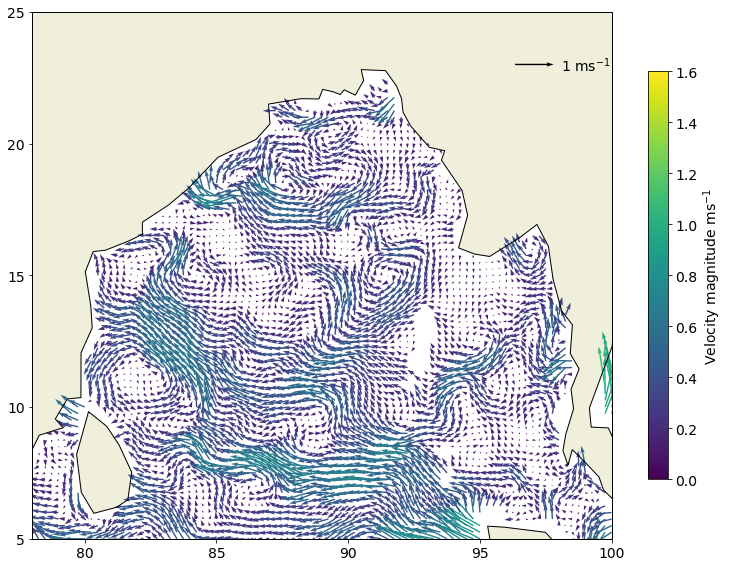

In [66]:
plt.close(1)
plt.figure(1, figsize=(15, 15))
gs = gridspec.GridSpec(3, 2, height_ratios=[0.1, 1, 0.1], width_ratios=[1, 0.05])
ax = plt.subplot(gs[:,0], projection=crs.PlateCarree())
ax.coastlines()
u = curr.U.sel(Depth=15, Time=curr.Time.values[40]).values
v = curr.V.sel(Depth=15, Time=curr.Time.values[40]).values
mag = np.sqrt(u**2 + v**2)

Q = plt.quiver(curr.Longitude, curr.Latitude, u, v, mag, scale=15)
ax.set_extent([78, 100, 5, 25])
ax.set_xticks(np.arange(80, 101, 5) )
ax.set_yticks(np.arange(5, 26, 5) )
ax.quiverkey(Q, 0.9, 0.9, 1, '1 ms$^{-1}$', labelpos='E')
ax.add_feature(cartopy.feature.LAND)

#longrid, latgrid = np.meshgrid(bathyS.lon.values, bathyS.lat.values)
#ax.contourf(longrid, latgrid, bathyS.elevation.where(bathyS.elevation > 0).values, cmap='Greens' )

plt.colorbar(Q, plt.clim(0,1.6), ax=ax, shrink=0.5, label="Velocity magnitude ms$^{-1}$")
plt.show()

In [23]:
str.split(str(t.values), 'T')[0]

'2018-12-27'

In [20]:
np.where(curr.Time == np.datetime64("2018-05-01") )

(array([116]),)

In [21]:
np.where(curr.Time == np.datetime64("2018-10-31") )

(array([288]),)

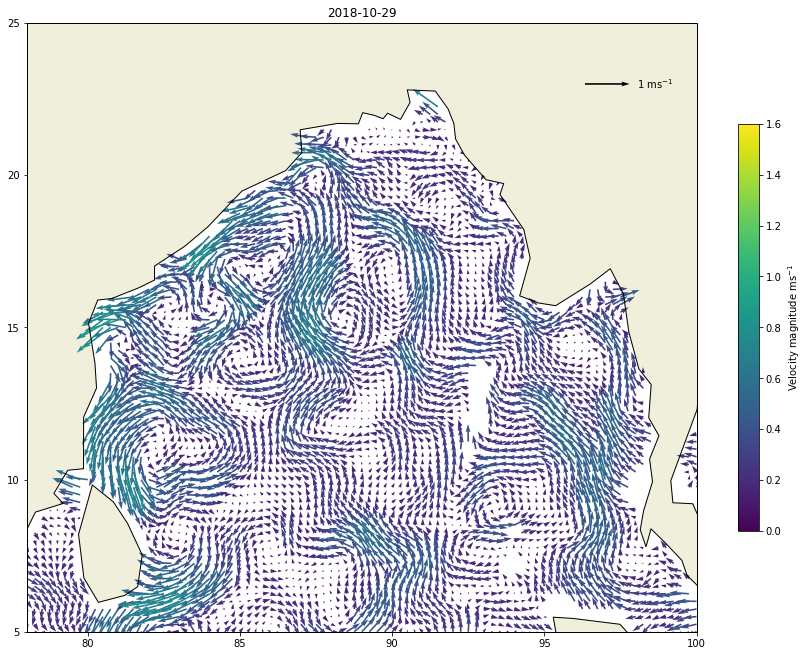

In [27]:
for tind in range(116, 288, 5):
    t = curr.Time[tind]
    plt.close(1)
    plt.figure(1, figsize=(15, 15))
    gs = gridspec.GridSpec(3, 2, height_ratios=[0.1, 1, 0.1], width_ratios=[1, 0.05])
    ax = plt.subplot(gs[:, :], projection=crs.PlateCarree())
    ax.coastlines()
    u = curr.U.sel(Depth=15, Time= t.values).values
    v = curr.V.sel(Depth=15, Time= t.values).values
    mag = np.sqrt(u**2 + v**2) #magnitude of velocity
    
    Q = plt.quiver(curr.Longitude, curr.Latitude, u, v, mag, scale=15)
    #X,Y = np.meshgrid(curr.Longitude, curr.Latitude)
    #S = ax.scatter(X, Y, c=mag, s=10, vmin=0, vmax=1.5)
    ax.set_extent([78, 100, 5, 25])
    ax.set_xticks(np.arange(80, 101, 5) )
    ax.set_yticks(np.arange(5, 26, 5) )
    ax.quiverkey(Q, 0.9, 0.9, 1, '1 ms$^{-1}$', labelpos='E')
    
    ax.set_title(str.split(str(t.values), 'T')[0])
    ax.add_feature(cartopy.feature.LAND)
    #ax.contourf(longrid, latgrid, bathyS.elevation.where(bathyS.elevation > 0).values, cmap='Greens' )
    plt.colorbar(Q, plt.clim(0,1.6), ax=ax, shrink=0.5, label="Velocity magnitude ms$^{-1}$")
    plt.savefig("./animations/currents/"+str(t.values)+".png")

In [28]:
!convert -delay 100 -loop 0 ./animations/currents/*.png ./animations/currents/animation.gif

In [25]:
!rm ./animations/currents/*.png

In [29]:
sla = xr.open_dataset("./Satellite_Data_SAC/sla_BOB_2018.nc")

In [30]:
sla

<xarray.Dataset>
Dimensions:    (latitude: 80, longitude: 88, time: 365)
Coordinates:
  * time       (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-12-31
  * longitude  (longitude) float32 78.125 78.375 78.625 ... 99.375 99.625 99.875
  * latitude   (latitude) float32 5.125 5.375 5.625 ... 24.375 24.625 24.875
Data variables:
    adt        (time, latitude, longitude) float64 ...
Attributes:
    CDI:                             Climate Data Interface version 1.9.4 (ht...
    Conventions:                     CF-1.6
    history:                         Fri Feb 15 15:49:27 2019: cdo sellonlatb...
    source:                          Altimetry measurements
    institution:                     CLS, CNES
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:    

Hovmoller plots for SLA
1. Time vs Long 78 - 100 (avgd. over 14N to 18N)
1. Time Lat 5 - 25 (avgd. over 87E to 89E)

In [53]:
sla_anom = sla.adt - sla.adt.mean(dim='time')

/home/aditya/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [57]:
sla_anom

<xarray.DataArray 'adt' (time: 365, latitude: 80, longitude: 88)>
array([[[ 0.084581,  0.09198 , ...,  0.058327,  0.075213],
        [ 0.105262,  0.11158 , ...,  0.053849,  0.068212],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[ 0.089881,  0.09618 , ...,  0.056327,  0.068013],
        [ 0.109662,  0.11498 , ...,  0.060449,  0.072312],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       ...,

       [[ 0.081481,  0.09668 , ..., -0.001573, -0.004187],
        [ 0.080362,  0.09668 , ..., -0.001251, -0.001088],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[ 0.082981,  0.09588 , ..., -0.017273, -0.021787],
        [ 0.081962,  0.09618 , ..., -0.018651, -0.020688],
        ...,
        [      nan,       nan, ...,  

/home/aditya/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


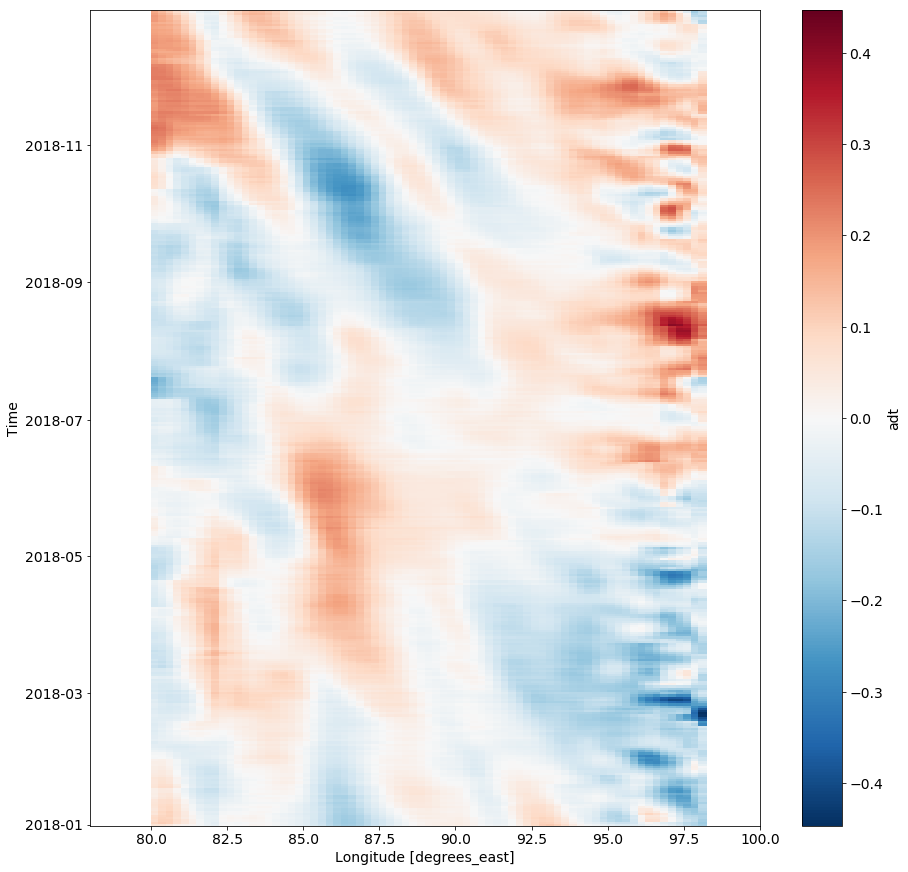

In [67]:
plt.figure(figsize=(15,15))
sla_anom.sel(latitude=slice(14, 18)).mean(dim="latitude").plot()